# Проект. Исследование стартапов  

Автор: Манузин Никита  
Дата: 25.10.2025

## Введение

**Цель проекта**: На исторических данных исследовать динамику и структуру финансирования стартапов, для оценки перспективы выхода на рынок с покупкой и развитием компаний в 2015 году.  

**Задачи проекта**:
1. Загрузить данные, познакомиться с их содержимым, провести предобработку данных.
2. Провести инжиниринг признаков:  
- Сгруппировать компании по срокам финансирования;
- Выделить средние и нишевые сегменты рынка.
3. Работа с выбросами и анализ:  
- Проанализировать и пометить выбросы в каждом из сегментов;
- Определить границы рассматриваемого периода, отбросить аномалии;
- Провести анализ типов финансирования по объёму и популярности.
4. Анализ динамики:  
- Провести анализ динамика предоставления финансирования по годам;
- Проанализировать динамику размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов;
- Проанализировать годовау динамику доли возвращённых средств по типам финансирования.

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

Файлы находятся в папке `datasets`, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации


In [1]:
# Устанавливаем библиотеку phik
!pip install phik

     |████████████████████████████████| 677 kB 2.8 MB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

In [3]:
# Загружаем данные датасета 'cb_investments'
df_invest = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)

In [4]:
# Загружаем данные датасета 'cb_returns'
df_returns = pd.read_csv('https://code.s3.yandex.net/datasets/cb_returns.csv')

Выведите информацию, которая необходима для принятия решений о предобработке.

Внимательнее познакомимся с данными датасета `df_invest`

In [5]:
df_invest.head(15)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Xavier University,http://www.xavier.edu/,NaN,NaN,"1,90,00,000",operating,USA,OH,Cincinnati,Cincinnati,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Tulane University,http://tulane.edu/,|Education|,Education,"1,20,00,000",operating,USA,LA,New Orleans,New Orleans,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Duke University,http://www.duke.edu,|Education|,Education,"87,00,000",operating,USA,NC,Raleigh,Durham,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Virginia Commonwealth University, Richmond",http://www.vcu.edu/,NaN,NaN,"60,00,000",operating,USA,VA,Richmond,Richmond,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,WeGame,http://www.WeGame.com,|Social Media|,Social Media,"35,00,000",acquired,USA,CA,SF Bay Area,San Francisco,...,0.0,0.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Знакомимся с данными датасета `df_returns`

In [7]:
df_returns.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [8]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


Сделайте вывод о полученных данных: каков их объём, соответствуют ли данные описанию, есть ли пропущенные значения, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Для анализа предоставлено 2 датасета:  
1) Датасет `https://code.s3.yandex.net/datasets/cb_investments.zip`, который содержит информацию о компаниях и состоявшемся финансировании, в данном датасете содержится 40 столбцов и 54294 строк.  
После превичного знакомства с данными можно сделать следующие выводы:
- Данные соответствуют представленному описанию;
- Пропущенные значения присутствуют во всех 40 столбцах;
- В названиях столбцов `market` и `funding_total_usd` присутствуют лишние пробелы а названия столбцов `round_A`, `round_B`, `round_C`, `round_D`, `round_E`, `round_F`, `round_G`, `round_H` целесообразнее привести к нижнему регистру написания;
- В столбце `category_list` разделитель "|" целесообразнее заменить на ",";
- в столбце `funding_total_usd` целесообразнее заменить на числовой тип данных `float64`;
- Столбцы `founded_at`, `founded_month`, `founded_quarter`. `first_funding_at`, `mid_funding_at`, `last_funding_at`, необходимо привести к типу данных даты и времени `datetime64`.  

2) Датасет `https://code.s3.yandex.net/datasets/cb_returns.csv`, который содержит информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов, в данном датасете содержится 14 столбцов и 15 строк.
После первичного знакомства с данными можно сделать следующие выводы:
- В данном датасете данные соответствуют описанию;
- Отсутствуют пропущенные значения, используются верные типы данных;
- Названия столбцов корректын и не требуют обработки.

### 1.2. Предобработка данных

In [9]:
# Перед обработкой данных создадим копию датафрейма для полседующей оценки проведенных изменений
temp = df_invest.copy()

len(temp)

54294

Посмотрим внимательнее на название столбцов в датасете `df_invest`

In [10]:
# Выводим названия столбцов df_invest
df_invest.columns

Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [11]:
# Приведем названия столбцов к единому стилю
df_invest.columns = df_invest.columns.str.lower().str.strip()

display(df_invest.columns)

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')

Посмотрим внимательнее на названия столбцов `df_returns`

In [12]:
# Выводим названия столбцов df_returns
df_returns.columns

Index(['year', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding'],
      dtype='object')

Уберите в столбце `funding_total_usd` выделение разрядов и приведите его к числовому типу.

In [13]:
#Убираем разделители в столбце 'funding_total_usd'
df_invest['funding_total_usd'] = df_invest['funding_total_usd'].str.replace(',', '')



In [14]:
# Приводим значения столбца 'funding_total_usd' к числовому типу данны
df_invest['funding_total_usd'] = pd.to_numeric(df_invest['funding_total_usd'], errors = 'coerce', downcast = 'float')

In [15]:
# Приводим значения столбцов к типу данных 'datetime64'
for column in ['founded_at', 'founded_month', 'founded_quarter', 'first_funding_at', 'mid_funding_at', 'last_funding_at']:
    df_invest[column] = pd.to_datetime(df_invest[column], errors = 'coerce')

In [16]:
# Делаем столбец 'year' индексом датафрейма
df_returns = df_returns.set_index('year')

In [17]:
# Нормализуем тектосвые данные в столбце `market`
df_invest['market'] = df_invest['market'].str.lower().str.strip()

In [18]:
def show_missing_stats(tmp0):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': tmp0.isnull().sum(),
        'Доля пропусков': tmp0.isnull().mean()
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    # Форматируем при выводе через Styler
    return (missing_stats.style.format({'Доля пропусков': '{:.4f}'}).background_gradient(cmap='coolwarm'))
show_missing_stats(df_invest)

,Кол-во пропусков,Доля пропусков
name,4857,0.0895
homepage_url,8305,0.1530
category_list,8817,0.1624
market,8817,0.1624
funding_total_usd,13387,0.2466
status,6170,0.1136
country_code,10129,0.1866
state_code,24133,0.4445
region,10129,0.1866
city,10972,0.2021


Учитывая достаточно высокую долю пропусков и последующую предполагаемую фильтрацию и агрегацию данных обрабатывать текстовые данные не данном этапе не нужно.

In [19]:
# Проверяем датасет 'df_invest' на полные дубликаты
df_invest.duplicated().sum()

4855

In [20]:
# Удаляем полные дубликаты 
df_invest = df_invest.drop_duplicates()

In [21]:
# Убираем строки, которые не содержат информации о финансировании
df_invest = df_invest[df_invest['funding_total_usd'].notna()]

Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

Оцените размер оставшихся пропусков в столбце.

In [22]:
# Создаем функцию для рассчета 'mid_funding_at'
def calculate_mid_funding(row):
    if pd.isna(row['mid_funding_at']):
        if pd.notna(row['first_funding_at']) and pd.notna(row['last_funding_at']):
            days_diff = (row['last_funding_at'] - row['first_funding_at']).days
            if days_diff >= 0:
                return row['first_funding_at'] + pd.Timedelta(days=days_diff/2)
    return row['mid_funding_at']

# Применяем функцию
df_invest['mid_funding_at'] = df_invest.apply(calculate_mid_funding, axis=1)

In [23]:
# Выведем игнормацию о датасете 'df_invest' после обработки
df_invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 49437
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  40906 non-null  object        
 1   homepage_url          38593 non-null  object        
 2   category_list         38404 non-null  object        
 3   market                38404 non-null  object        
 4   funding_total_usd     40907 non-null  float32       
 5   status                39802 non-null  object        
 6   country_code          37088 non-null  object        
 7   state_code            25619 non-null  object        
 8   region                37088 non-null  object        
 9   city                  36402 non-null  object        
 10  funding_rounds        40907 non-null  float64       
 11  participants          27331 non-null  float64       
 12  founded_at            32200 non-null  datetime64[ns]
 13  founded_month   

После заполнения пропусков в столбце `mid_funding_at` остался 1 пропуск.

Оцените полноту данных и сделайте предварительный вывод о том, достаточно ли данных для решения задач проекта. Какой процент данных был отброшен?

In [24]:
# Рассчитаем количество отброшенных данных 

deleted_rows = len(temp) - df_invest.shape[0]

# Считаем долю удаленных строк
deleted_rows_per = deleted_rows / len(temp)

display(f'Колчитество удаленных строк: {deleted_rows}')
display(f'Доля удаленных строк: {deleted_rows_per}')   

'Колчитество удаленных строк: 13387'

'Доля удаленных строк: 0.24656499797399345'

В результате проведенной предобработки данных были проведены следующие действия:  
- Нормализованы названия столбцов. Названия приведены к нижнему регистру, удалены лишние пробелы;  
- В столбце `funding_total_usd` убрано выделение разрядов, столбец  приведен к числовому типу;  
- Столбцы `founded_at`, `founded_month`, `founded_quarter`, `first_funding_at`, `mid_funding_at`, `last_funding_at` приведены к типу данных `datetime64`;  
- В датасете cb_returns столбец year сделан индексом всего датасета;  
- Проведена проверка датасета `df_invest` на полные дубликаты. Было обнаружено и удалено 4855 полных дубликатов;
- Данные были отфильтрованы от пропусков в столбце `funding_total_usd`, которые не несут какой-либо информации либо не содержат данных о финансировании;
- Заполнtys пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения использована середина интервала между этими двумя датами.

Итого в результате предобработки удалено 13387 строк, что составляет 24,65% от всех данных. Для анализа осталось доступно 40907 строк. Оставшихся данных достаточно для проведения дальнейшего анализа.


## Шаг 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования

Разделите все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируйте соотношение этих групп, создав два графика:

* По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

Совет: Для ясности и согласованности используйте единую цветовую палитру для всех графиков, чтобы каждая категория (например, «Единичное финансирование») всегда отображалась одним цветом.

In [25]:
# Создадим функцию для категоризации данных
def categorize_funding(row):
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    else:
        days_diff = (row['last_funding_at'] - row['first_funding_at']).days
        if days_diff <= 365:
            return 'Срок финансирования до года'
        else:
            return 'Срок финансирования более года'

# Создаем новый столбец по срокам финансирования
df_invest['funding_category'] = df_invest.apply(categorize_funding, axis=1)

In [26]:
count_category = df_invest['funding_category'].value_counts(normalize = True)
sum_funding = df_invest.groupby('funding_category')['funding_total_usd'].sum()
per_funding = sum_funding / sum_funding.sum()

display(count_category)
display(per_funding)

Единичное финансирование          0.589459
Срок финансирования более года    0.300511
Срок финансирования до года       0.110030
Name: funding_category, dtype: float64

funding_category
Единичное финансирование          0.306182
Срок финансирования более года    0.618716
Срок финансирования до года       0.075101
Name: funding_total_usd, dtype: float32

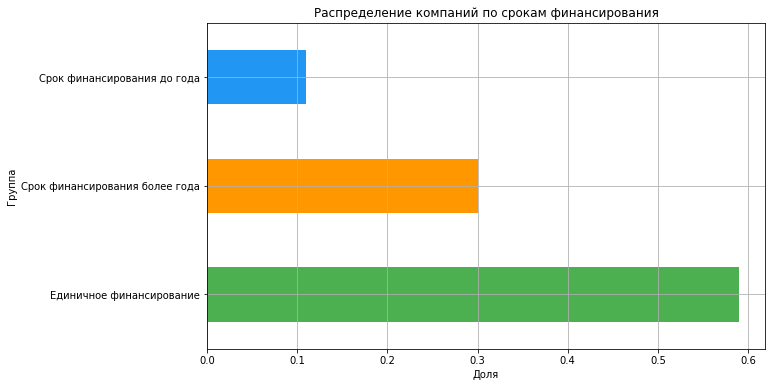

In [27]:
#Зададим цветоувю палитру
color_palette = {
    'Единичное финансирование': '#4CAF50',
    'Срок финансирования до года': '#2196F3',
    'Срок финансирования более года': '#FF9800'
}
# Строим график
count_category.plot(kind='barh', figsize=(10, 6), color=[color_palette[group] for group in count_category.index])

plt.title('Распределение компаний по срокам финансирования')
plt.ylabel('Группа')
plt.xlabel('Доля')
plt.grid()
plt.show()

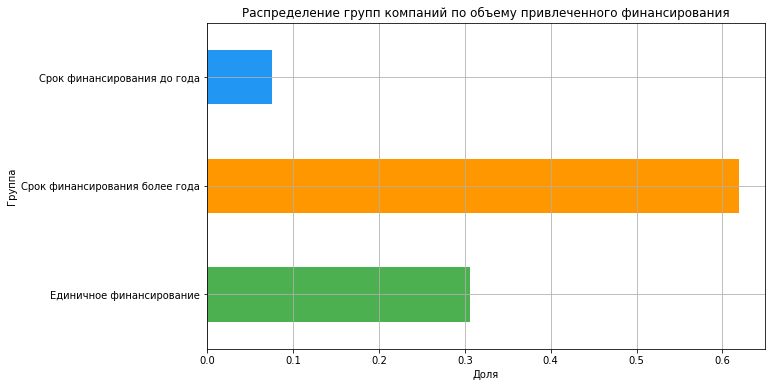

In [28]:
#Зададим цветоувю палитру
color_palette = {
    'Единичное финансирование': '#4CAF50',
    'Срок финансирования до года': '#2196F3',
    'Срок финансирования более года': '#FF9800'
}
# Строим график
per_funding.plot(kind='barh', figsize=(10, 6), color=[color_palette[group] for group in per_funding.index])

plt.title('Распределение групп компаний по объему привлеченного финансирования')
plt.ylabel('Группа')
plt.xlabel('Доля')
plt.grid()
plt.show()

Исходя из результов анализа, большая часть компаний(59%) от общего количества компаний использует один раунд финансирования. При этом доля финансирования, привлеченного этими компаниями составляет только 32% от общего объема всех привлеченных средств. Максимальный же объем средств(62%) привлекается компаниями, у которых было несколько раундов фининсирования, продолжительностью более 1 года.

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

In [29]:
count_markets = df_invest['market'].value_counts().reset_index()

display(count_markets)

,index,market
0,software,4812
1,biotechnology,3590
2,mobile,2344
3,e-commerce,1866
4,curated web,1693
...,...,...
389,project management,1
390,logistics company,1
391,intelligent systems,1
392,navigation,1


In [30]:
market_df = pd.DataFrame(count_markets)
market_df.columns = ['name', 'count_comp']


In [31]:
def categorize_market_segment(count):
    if count > 120:
        return 'массовый'
    elif 35 <= count <= 120:
        return 'средний'
    else:
        return 'нишевый'
    
market_df['segment'] = market_df['count_comp'].apply(categorize_market_segment)

In [32]:
display(market_df)

,name,count_comp,segment
0,software,4812,массовый
1,biotechnology,3590,массовый
2,mobile,2344,массовый
3,e-commerce,1866,массовый
4,curated web,1693,массовый
...,...,...,...
389,project management,1,нишевый
390,logistics company,1,нишевый
391,intelligent systems,1,нишевый
392,navigation,1,нишевый


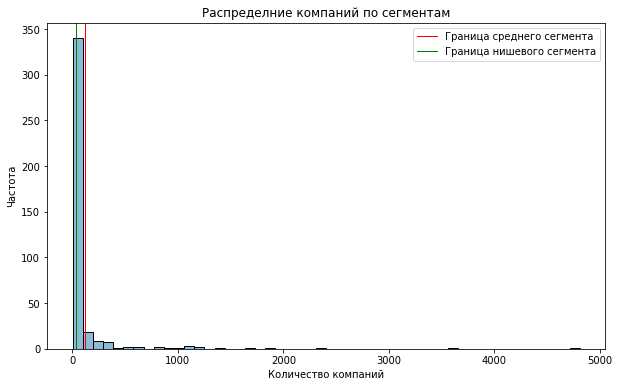

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data = market_df, x='count_comp', bins = 50, alpha = 0.5)

plt.title('Распределние компаний по сегментам')
plt.xlabel('Количество компаний')
plt.ylabel('Частота')
plt.axvline(120, color = 'red',
           linestyle = '-',
           linewidth = 1,
           label = 'Граница среднего сегмента')
plt.axvline(35, color = 'green',
           linestyle = '-',
           linewidth = 1,
           label = 'Граница нишевого сегмента')
plt.legend()
plt.show()

Оставьте в столбце `market` только массовые сегменты. Для остальных сегментов замените значения на заглушки — `niche` для нишевых и `mid` для средних.

Дальнейшие исследования выполняйте с учётом этой замены. Индивидуальные сегменты внутри средней и нишевой групп рассматривать не нужно — они объединяются в два общих сегмента.


In [34]:
segment_counts = df_invest['market'].value_counts()

#Создаем пустой словарь
replace_dict = {}

# Цикл для заполнения словаря
for segment, count in segment_counts.items():
    if count > 120:
        # Массовые сегменты - оставляем как есть (не добавляем в словарь)
        continue
    elif count >= 35:
        # Средние сегменты - заменяем на 'mid'
        replace_dict[segment] = 'mid'
    else:
        # Нишевые сегменты - заменяем на 'niche'
        replace_dict[segment] = 'niche'

# Заменяем значения
df_invest['market'] = df_invest['market'].replace(replace_dict)

In [35]:
df_invest['market'].value_counts(normalize = True)

software                0.125299
mid                     0.100016
biotechnology           0.093480
mobile                  0.061035
e-commerce              0.048589
curated web             0.044084
enterprise software     0.035960
health care             0.030856
clean technology        0.030726
games                   0.029086
advertising             0.028825
hardware + software     0.027653
social media            0.026117
health and wellness     0.022732
education               0.021977
niche                   0.021612
finance                 0.021560
analytics               0.017368
manufacturing           0.015519
security                0.014764
semiconductors          0.012603
web hosting             0.011041
consulting              0.009088
hospitality             0.008749
travel                  0.008593
fashion                 0.007890
news                    0.007838
messaging               0.007681
search                  0.007577
real estate             0.007265
saas      

Мы разделили все компании на 3 сегмента, в зависимости от количества компаний, которые работают в определенном сегменте рынка. Доля нишевых компаний(количество компаний в сегменте - до 35) составляет 2%, доля среднего сегмента(количество компаний в сегменте - до 35 до 120) составила 10 %, остальные компании работают в массовом сегменте(количество компаний в сегменте - до 35 до 120). Больше всего компаний массового сегмента работают в сегменте `Software`(12% от общего числа компаний). Самой малочисленной категорией компаний в массовом сегменте является категория `startups` с долей 0,03%

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

In [36]:
df_invest['funding_total_usd'].describe()

count    4.090700e+04
mean     1.591252e+07
std      1.686788e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

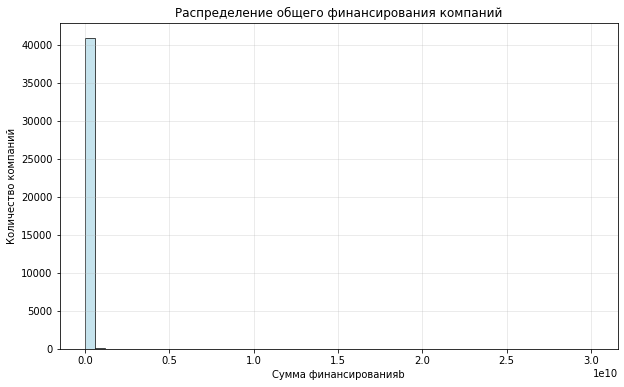

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df_invest['funding_total_usd'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Сумма финансированияb')
plt.ylabel('Количество компаний')
plt.grid(True, alpha=0.3)
plt.show()

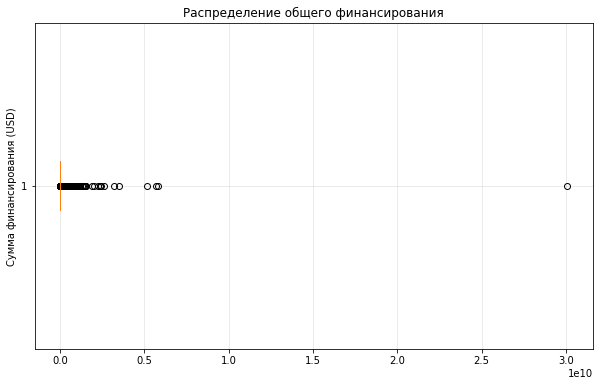

In [38]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_invest['funding_total_usd'], vert = False)
plt.title('Распределение общего финансирования')
plt.ylabel('Сумма финансирования (USD)')
plt.grid(True, alpha=0.3)
plt.show()

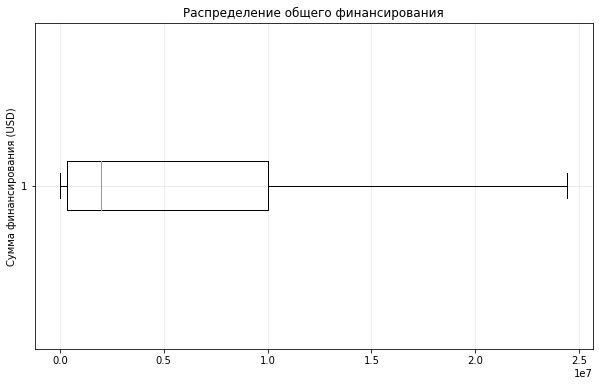

In [39]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_invest['funding_total_usd'], vert = False, showfliers = False)
plt.title('Распределение общего финансирования')
plt.ylabel('Сумма финансирования (USD)')
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
stats = df_invest['funding_total_usd'].describe()
median = stats['50%']
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1

print('Типичные значения:')

print(f"Медиана: ${median:,.0f}")
print(f"Типичный интервал: ${Q1:,.0f} - ${Q3:,.0f}")
print(f"Выбросы: > ${Q3 + 1.5 * IQR:,.0f}")

Типичные значения:
Медиана: $2,000,000
Типичный интервал: $350,000 - $10,000,000
Выбросы: > $24,475,000


Определите компании с аномальным объёмом общего финансирования — используйте метод IQR отдельно по каждому сегменту. Напомним, что все нишевые сегменты должны быть объединены в одну группу, а средние — в другую.

Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

In [41]:
for segment in df_invest['market'].unique():
    segment_data = df_invest[df_invest['market'] == segment]['funding_total_usd']
    

In [42]:
groups = df_invest.groupby('market')

# Создаем пустой словарь для хранения результатов
anomaly_summary = {}

# Проходим по каждой группе
for segment, group in groups:
    Q1 = group['funding_total_usd'].quantile(0.25)
    Q3 = group['funding_total_usd'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR

    # Определяем компании с аномальным финансированием
    anomalies = group[(group['funding_total_usd'] < lower_bound) | (group['funding_total_usd'] > upper_bound)]

    # Рассчитываем долю аномальных компаний
    anomaly_percentage = len(anomalies) / len(group) * 100

    anomaly_summary[segment] = {
        'total_count': len(group),
        '25%' : Q1,
        '50%' : group['funding_total_usd'].median(),
        '75%' : Q3, 
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'anomaly_count': len(anomalies),
        'anomaly_percentage': anomaly_percentage
    }

anomaly_df = pd.DataFrame(anomaly_summary).T
display(anomaly_df.sort_values('anomaly_percentage', ascending = False).head(10))

,total_count,25%,50%,75%,lower_bound,upper_bound,anomaly_count,anomaly_percentage
real estate,279.0,204552.0,1250000.0,5527303.5,0.0,13511430.75,48.0,17.204301
entertainment,150.0,125000.0,1000000.0,7726236.5,0.0,19128091.25,25.0,16.666667
consulting,349.0,125000.0,1150000.0,5330000.0,0.0,13137500.00,58.0,16.618911
search,291.0,300000.0,1065000.0,5320000.0,0.0,12850000.00,48.0,16.494845
cloud computing,152.0,585305.0,1811000.0,10000000.0,0.0,24122042.50,25.0,16.447368
saas,272.0,250000.0,1000000.0,4073750.0,0.0,9809375.00,44.0,16.176471
photography,204.0,178750.0,1161821.5,4248096.5,0.0,10352116.25,33.0,16.176471
technology,238.0,456500.0,2900000.0,24224925.0,0.0,59877562.50,38.0,15.966387
video,188.0,467039.5,2000000.0,7623782.0,0.0,18358895.75,30.0,15.957447
niche,830.0,150000.0,972500.0,5387727.5,0.0,13244318.75,132.0,15.903614


Типичные значения финансирования соответствуют значению столбца `50%`. Диапазон финансирования сегмента находится в диапазоне значений столбцов `25%` и `75%`. Сегментом, где самая большая доля компаний, получивших аномальное финансирование является `real estate`, с долей компаний 17%.

### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [43]:
year_2014 = df_invest[(df_invest['first_funding_at'].dt.year == 2014) & (df_invest['last_funding_at'].dt.year == 2014)]

In [44]:
start_date = year_2014['first_funding_at'].min()
last_date = year_2014['last_funding_at'].max()

display(f'Дата первого финансирования в 2014 году:{start_date}')
display(f'Дата последнего финансирования в 2014 году:{last_date}')

'Дата первого финансирования в 2014 году:2014-01-01 00:00:00'

'Дата последнего финансирования в 2014 году:2014-12-31 00:00:00'

Для проверки полноты данных выделили год из столбцов `first_funding_at`, данные в котором соответсвуют дате первого финасирования и `last_funding_at`, данные в котором соответствуют дате последнего финансирования. Диапазон дат от 2014-01-01 до 2014-12-31 говорит о том, что данные за 2014 год в данных полные

In [45]:
# Создаем пустой список для индексов аномальных компаний
anomalous_indices = []

# Проходим по каждому сегменту из anomaly_df
for segment in anomaly_df.index:
    # Получаем границы для текущего сегмента
    lower_bound = anomaly_df.loc[segment, 'lower_bound']
    upper_bound = anomaly_df.loc[segment, 'upper_bound']
    
    # Находим компании в этом сегменте, которые выходят за границы
    segment_companies = df_invest[df_invest['market'] == segment]
    anomalies_in_segment = segment_companies[
        (segment_companies['funding_total_usd'] < lower_bound) | 
        (segment_companies['funding_total_usd'] > upper_bound)
    ]
    
    # Добавляем индексы аномальных компаний в список
    anomalous_indices.extend(anomalies_in_segment.index.tolist())


# Исключаем аномальные компании из основного датасета
df_clean = df_invest.drop(anomalous_indices)

display(f'Исходный размер датасета: {len(df_invest)}')
display(f'Размер после исключения аномалий: {len(df_clean)}')
display(f'Исключено: {len(anomalous_indices)} компаний')

'Исходный размер датасета: 40907'

'Размер после исключения аномалий: 36036'

'Исключено: 4871 компаний'

In [46]:
# Исключаем данные о компаниях, получавших финансирование в те годы, где было менее 50 раундов
years = df_clean['mid_funding_at'].dt.year
right_years = years.value_counts()[years.value_counts() >= 50].index
df_final = df_clean[df_clean['mid_funding_at'].dt.year.isin(right_years)]

In [47]:
display(years.value_counts().sort_values())

1983.0       1
1921.0       1
1979.0       1
1989.0       1
1990.0       1
1993.0       1
1960.0       2
1987.0       2
1984.0       2
1985.0       3
1982.0       3
1996.0       3
1994.0       4
1995.0       4
1997.0       4
1992.0       4
1998.0       9
1999.0      30
2001.0      43
2002.0      53
2003.0      64
2000.0      68
2004.0     101
2005.0     705
2006.0    1180
2007.0    1606
2008.0    1999
2009.0    2657
2010.0    3513
2011.0    4334
2012.0    5563
2014.0    6201
2013.0    7872
Name: mid_funding_at, dtype: int64

In [48]:
display(f'Исходный размер датасета:{len(df_clean)}')
display(f'Размер после удаления компаний:{len(df_final)}')
display(f'Удалено:{len(df_clean) - len(df_final)}')

'Исходный размер датасета:36036'

'Размер после удаления компаний:35916'

'Удалено:120'

Проверка диапазона дат в столбцах `first_funding_at` и `last_funding_at` позволяет утвердать, что данные за 2014 год предоставлены в полном объеме. Для дальнейшего анализа была проведена проверка какое количество компаниий получили аномальное финансирование в рамках каждой группы сегмента рынка, компаний с аномальным финансированием не обнаружено. Затем были удалены данные о компаниях, которые получали финансирование в году,  в котором было менее 50 раундов финансирования, на этом этапе было удалено 55 строк.

### 3.3. Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

In [49]:
# Список столбцов с типами финансирования
funding_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]

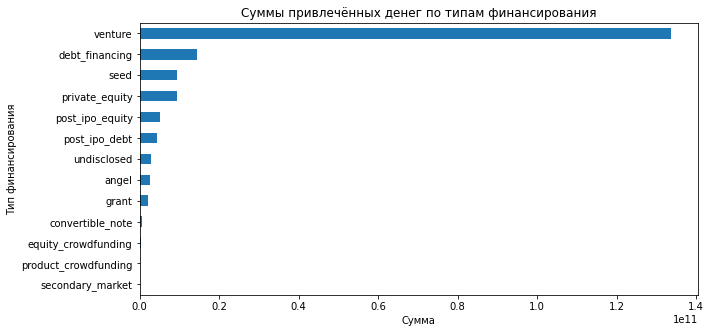

In [50]:
sum_types = df_final[funding_types].sum()
plt.figure(figsize=(10, 5))
sum_types.sort_values().plot(kind='barh')
plt.title('Суммы привлечённых денег по типам финансирования')
plt.xlabel('Сумма')
plt.ylabel('Тип финансирования')
plt.show()

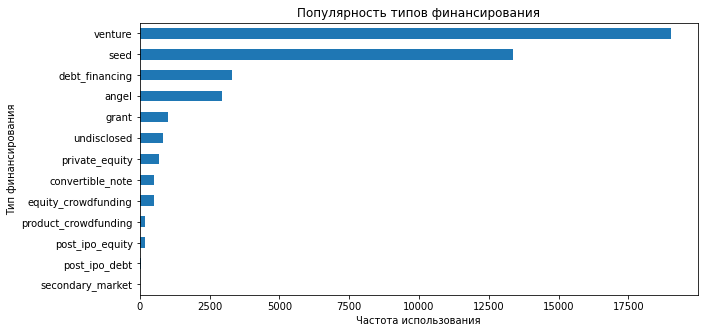

In [51]:
count_types = df_final[funding_types].astype(bool).sum(axis=0)
plt.figure(figsize=(10, 5))
count_types.sort_values().plot(kind='barh')
plt.title('Популярность типов финансирования')
plt.xlabel('Частота использования')
plt.ylabel('Тип финансирования')

plt.show()

Наиболее популярными типами финансирования являются `venture`, `seed` и `debt_financing`. А более всего привлекается денег через`venture`, `private_equity` и `debt_financing`. Стоит отметить что, несмотря на большую популярность `seed`, объем денежных средств через него привлекается сравнительно небольшой и наоборот тип финасирования `private_equity`, пользующийся сравнительно небольшой популярностью привлекает гораздо более существенный объем финанисрования.

Постройте график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

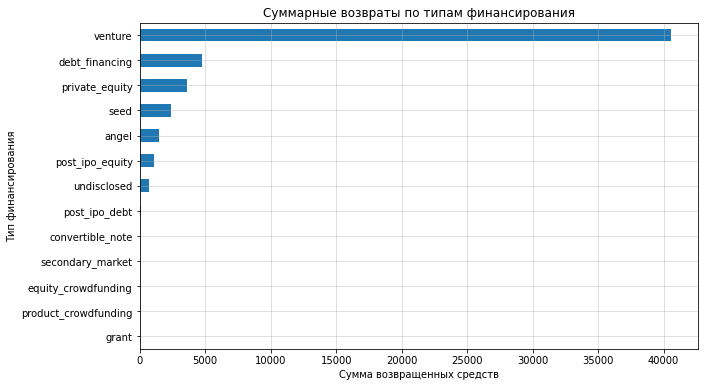

In [52]:
# Считаем общую сумму возвратов для каждого типа
total_returns = df_returns.sum()

# Сортируем от большего к меньшему
total_returns = total_returns.sort_values()

# Строим график
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
total_returns.plot(kind = 'barh', figsize = (10, 6))
plt.title('Суммарные возвраты по типам финансирования')
plt.xlabel('Сумма возвращенных средств')
plt.ylabel('Тип финансирования')
plt.grid(alpha = 0.5)
plt.show()

Проанализировав данные о возрате по типам финансирования за весь период можем отметить, что больше всего средств возвращется для типа финансирования `venture`. Следующую группу составляют типы финансирования `debt_financing` и `private_equity`.

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.

На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.

На основе полученных данных ответьте на вопросы:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

In [53]:
df_review = df_final.copy()

# 1. Рассчитываем средний объём раунда для каждой компании
df_review['avg_round'] = df_review['funding_total_usd'] / df_review['funding_rounds']

# 2. Добавляем год финансирования
df_review['year'] = df_review['mid_funding_at'].dt.year

# Проверяем результат
display(df_review[['name', 'funding_total_usd', 'funding_rounds', 'avg_round', 'year']].head())

,name,funding_total_usd,funding_rounds,avg_round,year
1,University of New Brunswick,2000000.0,1.0,2.000000e+06,2014
2,DuPont,9000000.0,1.0,9.000000e+06,2009
3,University of Michigan,7700000.0,3.0,2.566667e+06,2013
4,Case Western Reserve University,540000.0,1.0,5.400000e+05,2014
5,Xavier University,19000000.0,1.0,1.900000e+07,2014


In [54]:
# Группируем по годам и считаем статистики
year_stats = df_review.groupby('year').agg({
    'avg_round': 'median',      # типичный размер раунда
    'funding_rounds': 'count'   # количество раундов
}).reset_index()

display(year_stats)

,year,avg_round,funding_rounds
0,2000,2.365234e+06,68
1,2002,3.750000e+06,53
2,2003,1.505000e+06,64
3,2004,3.066667e+06,101
4,2005,4.500000e+06,705
5,2006,3.945338e+06,1180
6,2007,2.893271e+06,1606
7,2008,2.225000e+06,1999
8,2009,1.500000e+06,2657
9,2010,1.290000e+06,3513


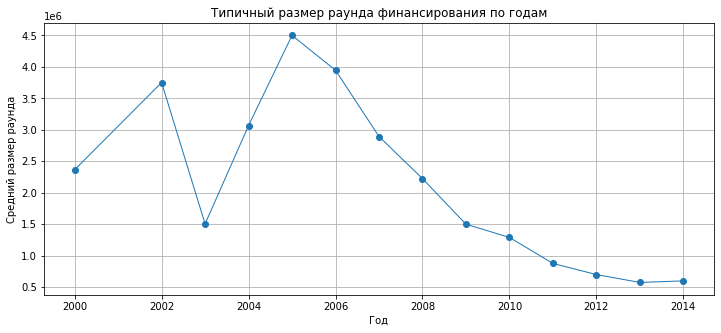

In [55]:
plt.figure(figsize=(12, 5))
plt.plot(year_stats['year'], year_stats['avg_round'], marker='o', linewidth=1)
plt.title('Типичный размер раунда финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Средний размер раунда')
plt.grid()
plt.show()

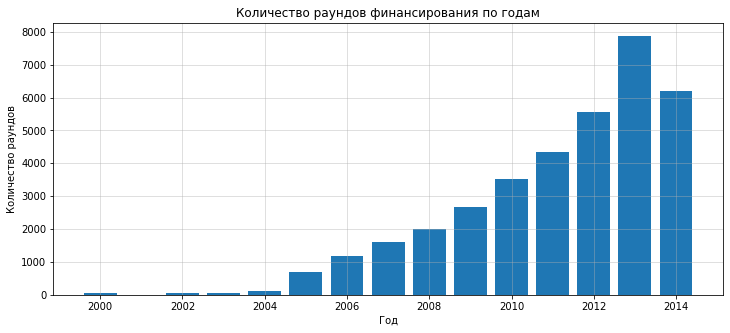

In [56]:
plt.figure(figsize=(12, 5))
plt.bar(year_stats['year'], year_stats['funding_rounds'])
plt.title('Количество раундов финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Количество раундов')
plt.grid(alpha = 0.5)
plt.show()

Максимальльное значение типичного размера собранных средств в рамках одного раунда наблюдалось в 2004 году. Затем с 2004 года размер этого значения постоянно снижался, вплоть до 2014, где зафиксировано незначительное увеличение относительно 2013 года. 

Если рассмотреть динамику количества раундов финансирования по годам, можно отметить, что количество раундов постоянно увеличивалось начиная с 2001 года, вплоть до 2013 года, где был зафиксирован максимум по количеству проведенных раундов финансирования, затем в 2014 году случился спад относительно 2013 г, однако значения все же оставались выше всех предыдущих периодов.

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

In [57]:
# Создаем копию датафрейма для безопасной работы
df_analysis = df_final.copy()

# Добавляем год в копию
df_analysis['year'] = df_analysis['mid_funding_at'].dt.year

# Создаем сводную таблицу
pivot_table = df_analysis.pivot_table(
    values='funding_total_usd',
    index='year', 
    columns='market',
    aggfunc='sum',
    fill_value=0
)

display(pivot_table)

market,advertising,analytics,apps,automotive,big data,biotechnology,clean technology,cloud computing,consulting,curated web,...,semiconductors,social media,social network media,software,sports,startups,technology,travel,video,web hosting
year,,,,,,,,,,,,,,,,,,,,,
2000,14470000,14822803,0,0,0,0,0,11500000,4500000,1000000,...,0,0,0,31732640,0,0,0,50230,0,95343088
2002,24500000,7500000,0,0,0,0,34390436,0,0,4650000,...,0,0,0,101026392,200000,0,11000000,0,0,0
2003,10500000,3840000,0,4530000,0,85531176,50352940,0,0,2550000,...,28000000,5000,0,66086036,0,0,0,0,5000000,0
2004,6000000,3000000,0,0,0,97184864,50427952,0,0,27050000,...,88782800,6850000,0,140823792,0,0,1750000,10230000,14704000,27000000
2005,127196024,79014048,0,22500000,0,480063584,19420000,0,44862000,53450000,...,586220736,14780000,5200000,993076608,1882200,0,50728424,27830000,6470551,483332640
2006,299299456,139701312,1310600,12660000,0,903500544,131473888,9951809,23965548,164673696,...,1227940736,60169880,5245100,1646868608,7000000,0,22791000,11700000,35171772,649959296
2007,556704320,98829000,0,37712600,7780000,1704078336,749711232,20354344,70346344,314704512,...,1616604160,89022512,24104020,1686115584,16401580,0,180190208,13950000,85150640,361121440
2008,622673472,208077840,4300000,59478636,2452515,1716033024,3165808384,44375000,19061080,336500032,...,1107199360,76034536,10998076,1365005696,9554790,5010387,277726240,54905632,37865176,781623744
2009,563446016,140949328,7219000,20800312,597375,3915900416,1963502848,52223720,62715164,261360480,...,1434206720,60033256,9451188,1254334464,11808750,460700,36078848,24536468,22305584,471131040


In [58]:
growing_segments = []
for col in pivot_table.columns:
    if col not in ['mid', 'niche'] and pivot_table.loc[2014, col] > pivot_table.loc[2013, col]:
        growing_segments.append(col)

# Отфильтровываем таблицу
filtered_pivot = pivot_table[growing_segments]

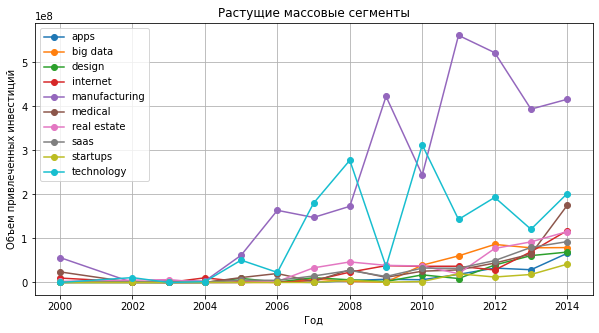

In [59]:
plt.figure(figsize=(10, 5))
for segment in filtered_pivot.columns:
    plt.plot(filtered_pivot.index, filtered_pivot[segment], marker='o', label=segment)

plt.title('Растущие массовые сегменты')
plt.xlabel('Год')
plt.ylabel('Объем привлеченных инвестиций')
plt.legend()
plt.grid()
plt.show()

Наиболее быстрый и уверенный рост показывают сегменты `design`, `finance`, `real_estate` и `hospitality`

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например `1e-60`. Это поможет избежать деления на ноль.

In [60]:
funding_pivot = df_analysis.pivot_table(
    values=['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
            'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
            'post_ipo_debt', 'secondary_market', 'product_crowdfunding'],
    index='year',
    aggfunc='sum'
)

In [61]:
display(funding_pivot)

,angel,convertible_note,debt_financing,equity_crowdfunding,grant,post_ipo_debt,post_ipo_equity,private_equity,product_crowdfunding,secondary_market,seed,undisclosed,venture
year,,,,,,,,,,,,,
2000,24086333.0,0.0,1.400000e+07,0.0,293114.0,0.000000e+00,3.467747e+06,0.000000e+00,0.0,7718867.0,1.675914e+07,215502640.0,3.753622e+08
2002,3000000.0,0.0,1.530967e+07,0.0,0.0,0.000000e+00,3.000000e+05,4.644188e+07,0.0,0.0,1.046519e+07,42323731.0,3.423629e+08
2003,5629661.0,0.0,1.050000e+06,0.0,16850717.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.531836e+07,10280000.0,4.002344e+08
2004,11013741.0,0.0,3.081662e+07,0.0,14027534.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.810473e+07,98758160.0,7.230162e+08
2005,60914621.0,0.0,1.017207e+08,0.0,6266481.0,0.000000e+00,4.796022e+06,5.000000e+06,0.0,0.0,3.942520e+07,8871332.0,4.902948e+09
2006,70756153.0,11807857.0,1.408484e+08,933057.0,6147500.0,0.000000e+00,0.000000e+00,3.582024e+07,0.0,0.0,6.679477e+07,71842903.0,9.200694e+09
2007,201152441.0,14116788.0,6.579016e+08,0.0,34237779.0,0.000000e+00,1.200000e+07,1.958479e+08,0.0,0.0,1.922965e+08,109649902.0,1.215159e+10
2008,249299613.0,28600902.0,4.286221e+08,0.0,23485347.0,0.000000e+00,3.600000e+07,1.917563e+08,1000000.0,0.0,3.020030e+08,143785523.0,1.448512e+10
2009,157822426.0,41257969.0,1.485424e+09,2049671.0,300835487.0,0.000000e+00,3.662890e+07,2.704780e+08,303050.0,19300000.0,2.843514e+08,99687229.0,1.522608e+10


In [62]:
# Рассчитываем долю возвратов для каждого типа финансирования
return_ratios = df_returns / (funding_pivot + 1e-60)

In [63]:
display(return_ratios)

,angel,convertible_note,debt_financing,equity_crowdfunding,grant,post_ipo_debt,post_ipo_equity,private_equity,product_crowdfunding,secondary_market,seed,undisclosed,venture
year,,,,,,,,,,,,,
2000,2.669564e-07,0.000000e+00,6.185714e-07,0.000000e+00,0.0,0.000000e+00,2.710694e-07,0.000000e+00,0.000000e+00,2.591054e-08,9.964712e-07,3.629190e-07,1.475908e-07
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,1.136667e-06,2.000000e+58,2.233882e-07,0.000000e+00,0.0,0.000000e+00,1.133333e-06,3.251376e-08,0.000000e+00,6.000000e+58,6.297066e-07,6.088783e-07,6.116901e-07
2003,6.057203e-07,1.000000e+58,1.038095e-06,0.000000e+00,0.0,0.000000e+00,2.110000e+60,1.620000e+60,0.000000e+00,8.000000e+58,5.052762e-07,9.143969e-07,5.843076e-07
2004,8.335043e-07,1.000000e+58,4.396978e-07,0.000000e+00,0.0,0.000000e+00,3.380000e+60,2.190000e+60,0.000000e+00,5.500000e+59,5.484755e-07,3.360735e-07,7.688625e-07
2005,5.098940e-07,2.000000e+58,3.449644e-07,0.000000e+00,0.0,0.000000e+00,7.318565e-07,4.800000e-07,0.000000e+00,5.000000e+58,6.746954e-07,1.071992e-06,5.361917e-07
2006,6.748530e-07,1.507471e-07,8.037720e-07,2.036317e-07,0.0,0.000000e+00,2.058000e+61,4.653793e-07,0.000000e+00,1.200000e+59,9.253718e-07,6.505862e-07,3.369507e-07
2007,8.178375e-07,2.280972e-07,1.910316e-07,1.000000e+58,0.0,0.000000e+00,2.030000e-06,4.534642e-07,0.000000e+00,5.700000e+59,3.661533e-07,5.049708e-07,2.950535e-07
2008,4.124756e-07,5.978832e-08,9.274838e-07,3.000000e+58,0.0,0.000000e+00,2.341111e-06,6.799254e-07,0.000000e+00,4.700000e+59,2.970831e-07,2.852860e-07,1.875732e-07


In [64]:
for col in return_ratios.columns:
    for year in return_ratios.index:
        if return_ratios.loc[year, col] > 1:
            return_ratios.loc[year, col] = None

Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

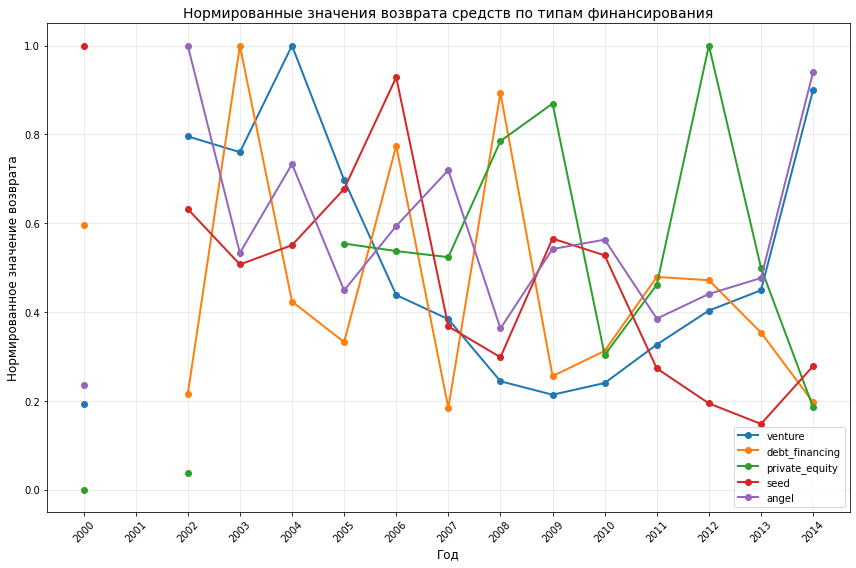

In [65]:
# Выбираем нужные типы финансирования
selected_columns = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']
selected_data = return_ratios[selected_columns]

# Нормируем данные (делим каждое значение на максимальное в столбце)
normalized_data = selected_data / selected_data.max()

# Строим график
plt.figure(figsize=(12, 8))

for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], marker='o', label=column, linewidth=2)

plt.title('Нормированные значения возврата средств по типам финансирования', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Нормированное значение возврата', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(normalized_data.index, rotation=45)
plt.tight_layout()
plt.show()

наиболее устойчивый рост возврата средств отмечается для типов финансирования `angel` и `venture`

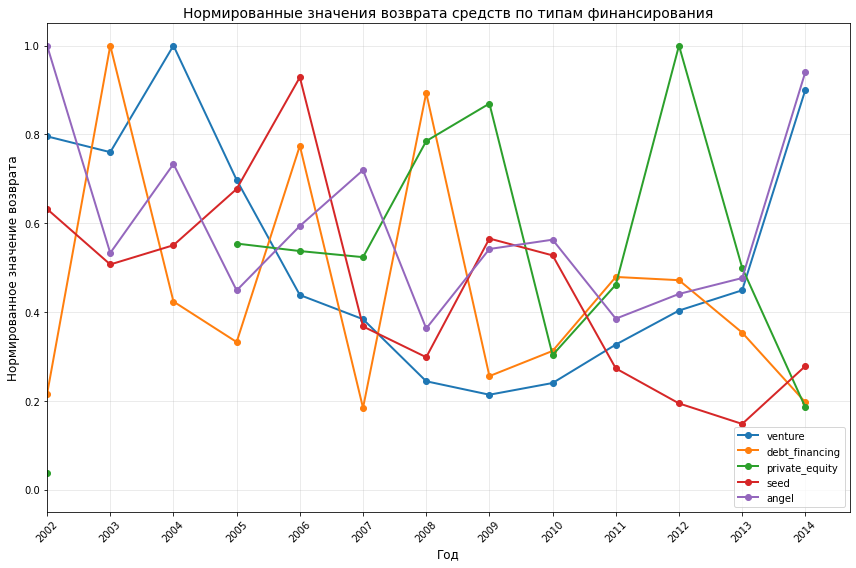

In [66]:
# Строим график
plt.figure(figsize=(12, 8))

for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], marker='o', label=column, linewidth=2)

plt.title('Нормированные значения возврата средств по типам финансирования', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Нормированное значение возврата', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(normalized_data.index, rotation=45)
plt.tight_layout()
plt.xlim(2002)
plt.show()


## Шаг 5. Итоговый вывод и рекомендации

Представьте, что на календаре 2015 год. Опираясь на результаты анализа, дайте рекомендацию заказчику:

* в какую отрасль стоит инвестировать;
* какой тип финансирования при этом будет наиболее уместным.

Подведите итоги проекта:
* опишите, какие шаги были выполнены;
* какие выводы удалось сделать;
* насколько выводы согласуются между собой или, наоборот, вызывают сомнения.



***Общий обзор проделанной работы***

В ходе исследования были проанализированы данные о 54294 компаниях и их финансировании. Основной целью исследования являлось определение оптимального типа финансирования и отрасли для инвестиций. Для этого была проделана следующая работа: 
1) Данные были загружены в 2 датафрейма `df_invest` и `df_returns`, затем предобработаны:  
- Нормализованы названия столбцов. Названия приведены к нижнему регистру, удалены лишние пробелы;  
- В столбце `funding_total_usd` убрано выделение разрядов, столбец  приведен к числовому типу;  
- Столбцы `founded_at`, `founded_month`, `founded_quarter`, `first_funding_at`, `mid_funding_at`, `last_funding_at` приведены к типу данных `datetime64`;  
- В датасете cb_returns столбец year сделан индексом всего датасета;  
- Проведена проверка датасета `df_invest` на полные дубликаты. Было обнаружено и удалено 4855 полных дубликатов;
- Данные были отфильтрованы от пропусков в столбце `funding_total_usd`, которые не несут какой-либо информации либо не содержат данных о финансировании;
- Заполнены пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения использована середина интервала между этими двумя датами.

Итого в результате предобработки удалено 13387 строк, что составляет 24,65% от всех данных. Для анализа осталось доступно 40907 строк. Оставшихся данных достаточно для проведения дальнейшего анализа.  

2) Проведен инжениринг признаков: 
- Все компании были разделены на 3 группы по срокам финансирования: `единичное финансирование`, `срок финансирования до года`, `срок финансирования более года`. Проанализировав компании в разрезе этих групп делаем вывод, что большая часть компаний(59%) от общего количества компаний использует один раунд финансирования. При этом доля финансирования, привлеченного этими компаниями составляет только 32% от общего объема всех привлеченных средств. Максимальный же объем средств(62%) привлекается компаниями, у которых было несколько раундов фининсирования, продолжительностью более 1 года;  
- Проведена сегментация компаний по сегмантам рынка, для анализа  оставлены компании массовых сегментов, а компании средних и нишевых сегментов были объеденины в соответствующие сегменты и при дальнейшем анализе учитывались как один сегмент. Проведенный анализ сегментов показал, что доля нишевых компаний(количество компаний в сегменте - до 35) составляет 2%, доля среднего сегмента(количество компаний в сегменте - до 35 до 120) составила 10 %, остальные компании работают в массовом сегменте(количество компаний в сегменте - до 35 до 120). Больше всего компаний массового сегмента работают в сегменте `Software`(12% от общего числа компаний). Самой малочисленной категорией компаний в массовом сегменте является категория `startups` с долей 0,03%;  

3) Обработаны и проанализированы выбросы. Для этого для каждого сегмента рассчитаны типичные значения финансирования для компании. Компаний, получивших аномальное финансирование не обнаружено. Также оставлены только данные о компаниях, которые получали финансирование в те годы, где было более 50 раундов за год. Итого было удалено 55 строк. 

4) Проведен анализ типов финансирования по объему и популярности. Анализ показал, что наиболее популярными типами финансирования являются `venture`, `seed` и `debt_financing`. А более всего привлекается денег через`venture`, `private_equity` и `debt_financing`. Стоит отметить что, несмотря на большую популярность `seed`, объем денежных средств через него привлекается сравнительно небольшой и наоборот тип финасирования `private_equity`, пользующийся сравнительно небольшой популярностью привлекает гораздо более существенный объем финанисрования.

5) Проведен анализ возвратов инвестиций на каждый тип финансирования за все время. Проанализировав данные о возрате по типам финансирования за весь период можем отметить, что больше всего средств возвращется для типа финансирования `venture`. Следующую группу составляют типы финансирования `debt_financing` и `private_equity`.  

6) Проведен анализ динамики финансирования по годам. Здесь можем отметить, что Максимальльное значение типичного размера собранных средств в рамках одного раунда наблюдалось в 2004 году. Затем с 2004 года размер этого значения постоянно снижался, вплоть до 2014, где зафиксировано незначительное увеличение относительно 2013 года. Если рассмотреть динамику количества раундов финансирования по годам, можно отметить, что количество раундов постоянно увеличивалось начиная с 2001 года, вплоть до 2013 года, где был зафиксирован максимум по количеству проведенных раундов финансирования, затем в 2014 году случился спад относительно 2013 г, однако значения все же оставались выше всех предыдущих периодов.  

7) Проведен анализ динамики размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов. Наиболее быстрый и уверенный рост показывают сегменты `design`, `finance`, `real_estate` и `hospitality`.

8) Проведен анализ годовой динамики доли возвращённых средств по типам финансирования. Наиболее устойчивый рост возврата средств отмечается для типов финансирования `angel` и `venture`.

***Рекомендации*** 

Вкладываться стоит в сегменты рынка, показывающие рост инвестиций, такие как `design`, `finance`, `real_estate` и `hospitality`. При выборе типа финансирования стоит обратить внимание на те типы, которые пользуются популярностью, в рамках которых привлекается больший объем и имеющие устойчивый рост возврата средств. Например, `venture`